# Krystyn Gutu

**Analyzing Cruise Ship Data**

The goal is to assess a cruise ship dataset and to build models using Naive Bayes (Gaussian and Bernoulli) and Decision Trees.

The dataset contains 1309 rows and 10 columns. The features are ID; Port of Embarkation; Economic Class; Sex; Age; Number of Siblings or Spouses on Board; Number of Parents or Children on Board; Passenger Fare; Child Fare; and the prediction feature, Purchased Package

**Processing and Cleaning the Data**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing
from plotly.subplots import make_subplots
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
cruise_analysis = pd.read_csv("Cruise Director Analysis.csv")
cruise_analysis.shape

(1309, 10)

In [3]:
cruise_analysis.head()

,ID,Port of Embarkation,Economic Class,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,ChildFare?,PurchasedPackage
0,3,Ft. Lauderdale,Upper,Male,32.5,0.0,0.0,1480.5,N,No
1,11,Miami,Lower,Male,25.0,0.0,0.0,66.5,N,Yes
2,26,Miami,Lower,Male,27.0,0.0,0.0,55.0,N,No
3,39,Miami,Upper,Female,33.0,0.0,0.0,605.5,N,Yes
4,56,Miami,Lower,Male,37.0,2.0,0.0,55.5,N,No


In [4]:
num_rows = math.ceil(len(cruise_analysis.columns[1:]) / 5)

fig = make_subplots(rows = num_rows, cols = 5, subplot_titles = cruise_analysis.columns[1:], vertical_spacing = 0.1)

for i, column in enumerate(cruise_analysis.columns[1:]):
    row = i // 5 + 1
    col = i % 5 + 1

    hist_trace = go.Histogram(x = cruise_analysis[column], name = column, marker = dict(line = dict(color = 'black', width = 1)))
    fig.add_trace(hist_trace, row = row, col = col)

fig.update_layout(height = num_rows * 500, width = 2000, showlegend = False)
fig.show()

In [5]:
cruise_analysis.dtypes

ID                                      int64
Port of Embarkation                    object
Economic Class                         object
Sex                                    object
Age                                   float64
No of Siblings or Spouses on Board    float64
No of Parents or Children on Board    float64
Passenger Fare                        float64
ChildFare?                             object
PurchasedPackage                       object
dtype: object

In [6]:
string_to_int_mappings = {}

for column_name in cruise_analysis.columns:
    if cruise_analysis[column_name].dtype == "object":

        # Use factorize() to create a mapping from string values to integers
        labels, uniques = pd.factorize(cruise_analysis[column_name])
        string_to_int_mappings[column_name] = dict(zip(uniques, labels))

# Print the mappings
for column, mapping in string_to_int_mappings.items():
    print(f"{column}: {mapping}")

Port of Embarkation: {'Ft. Lauderdale': 0, 'Miami': 1, 'Jacksonville': 1}
Economic Class: {'Upper': 0, 'Lower': 1, 'Middle': 1}
Sex: {'Male': 0, 'Female': 0}
ChildFare?: {'N': 0, 'Y': 0}
PurchasedPackage: {'No': 0, 'Yes': 1}


In [7]:
for col in cruise_analysis:
    if str(cruise_analysis[col].dtype) not in ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        le = preprocessing.LabelEncoder()
        cruise_analysis[col] = le.fit_transform(cruise_analysis[col])

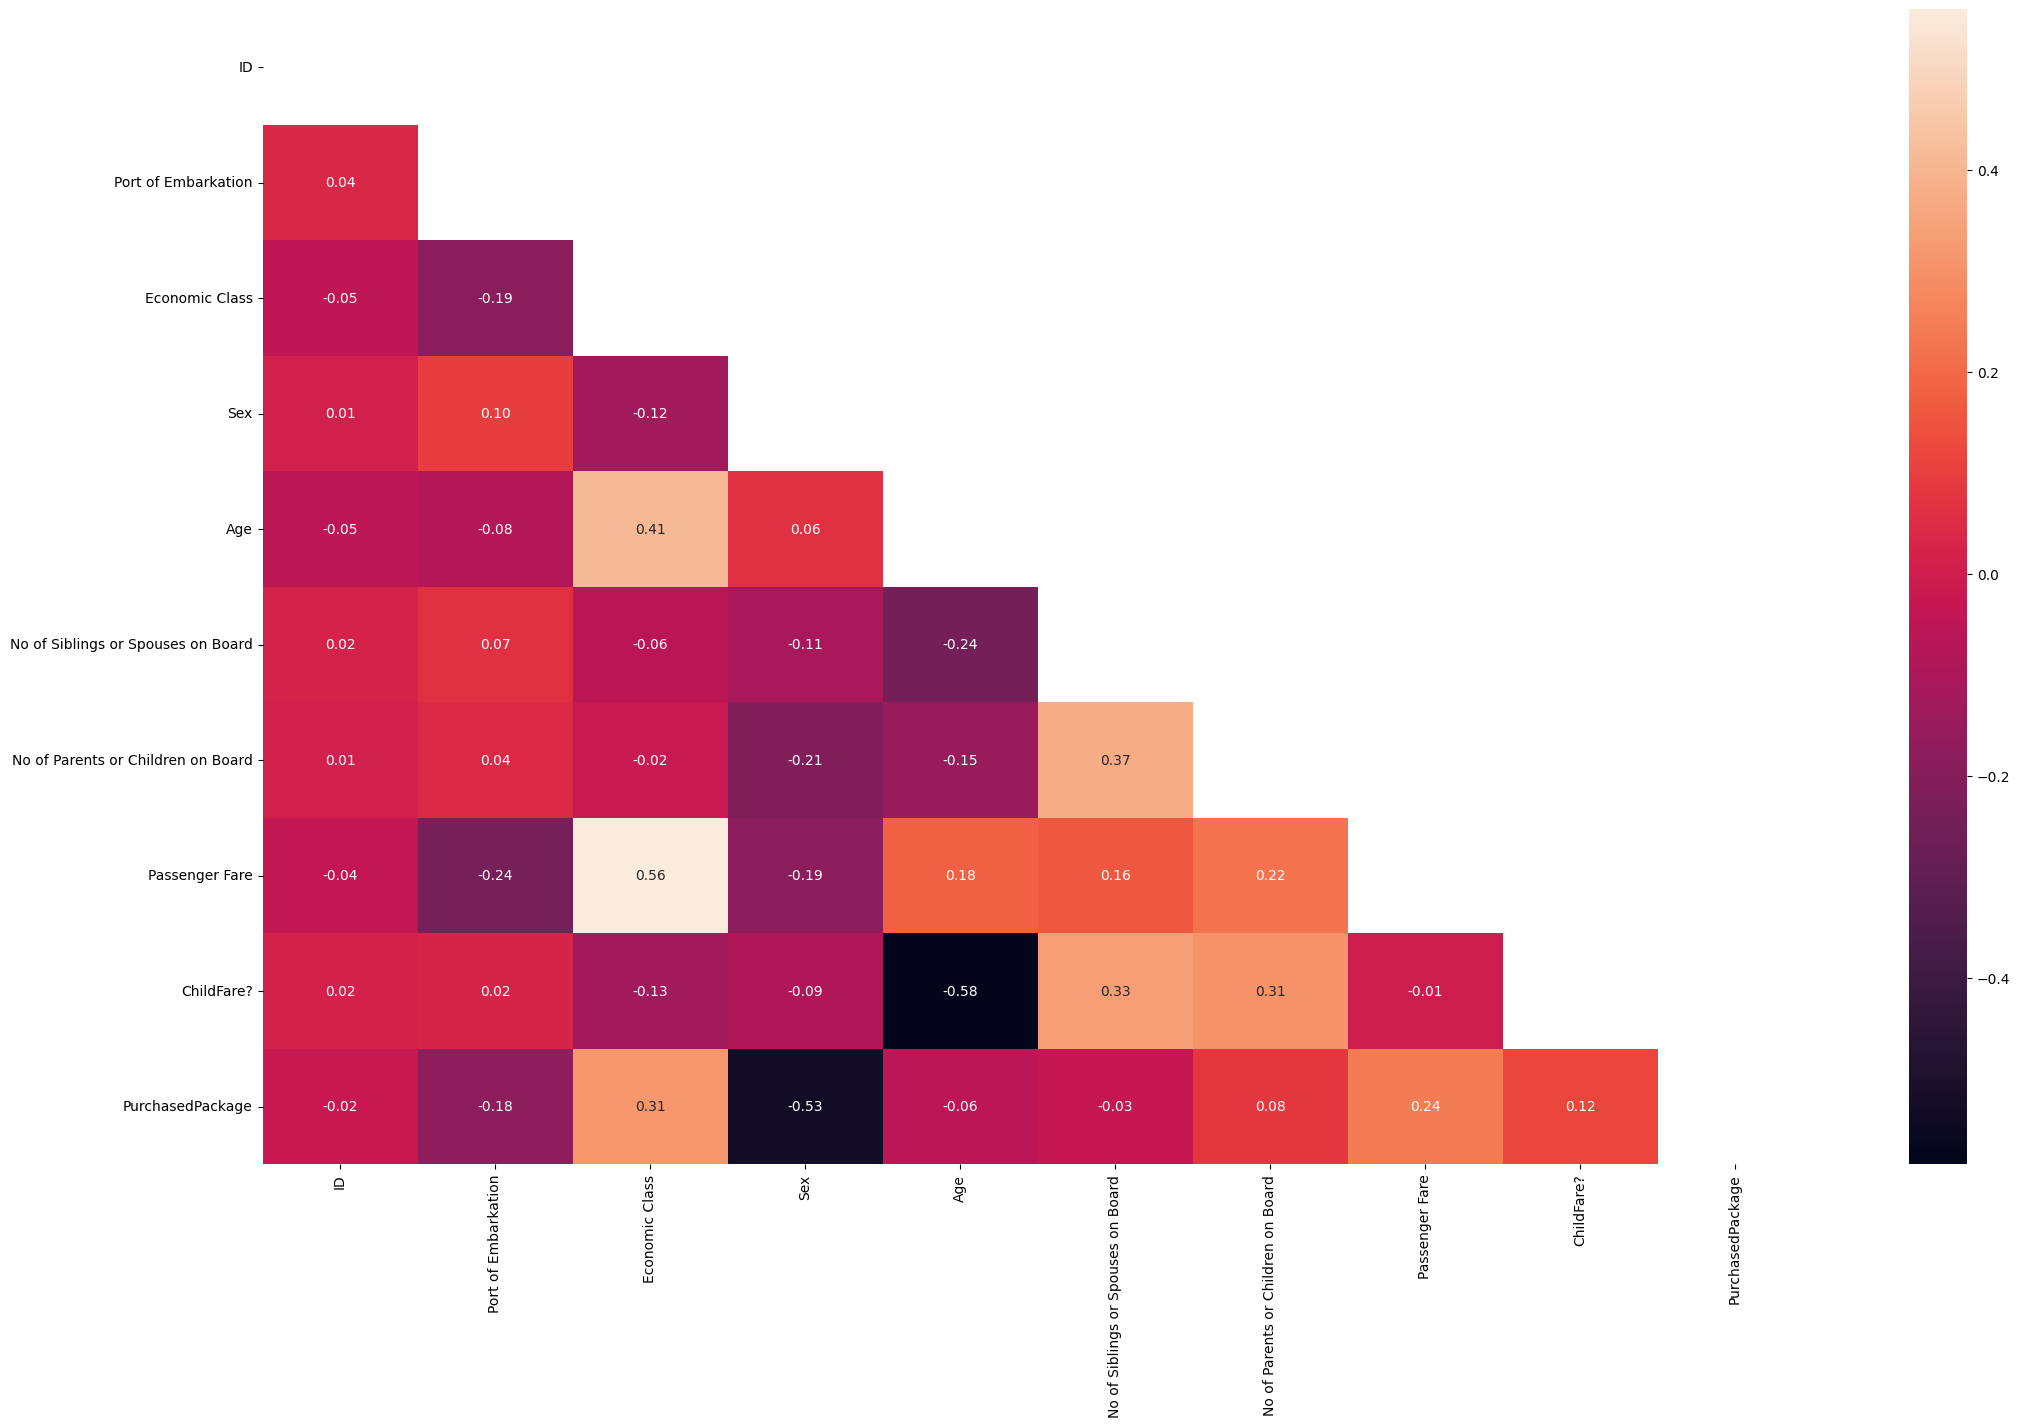

In [8]:
corr = cruise_analysis.corr(method = "pearson")
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize = (25, 15))
sns.heatmap(cruise_analysis.corr(), annot = True,fmt = ".2f",mask = mask)
plt.show()

In [9]:
c = cruise_analysis.corr().abs()
s = c.unstack()
so = s.sort_values(ascending = False)
so = so[(so < 1) & (so > 0.3)].drop_duplicates().to_frame()
so.columns = ["correlation"]
so

,,correlation
Age,ChildFare?,0.584236
Economic Class,Passenger Fare,0.558793
PurchasedPackage,Sex,0.528693
Economic Class,Age,0.408099
No of Parents or Children on Board,No of Siblings or Spouses on Board,0.373587
ChildFare?,No of Siblings or Spouses on Board,0.331953
PurchasedPackage,Economic Class,0.312469
No of Parents or Children on Board,ChildFare?,0.307018


In [10]:
print(cruise_analysis.isnull().any())

ID                                    False
Port of Embarkation                   False
Economic Class                        False
Sex                                   False
Age                                    True
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Passenger Fare                        False
ChildFare?                            False
PurchasedPackage                      False
dtype: bool


In [11]:
mean_age = cruise_analysis["Age"].mean()
print(mean_age)

29.88116634799235


In [12]:
c = cruise_analysis.Age.fillna(value = mean_age, inplace = True)
print(c)

None


**Training and Testing on Naive Bayes: Gaussian and Bernoulli**

In [13]:
X = cruise_analysis.drop(["PurchasedPackage"], axis = 1)
y = cruise_analysis["PurchasedPackage"]

In [14]:
def calculate_probability(X, mean, std):
    exponent = exp(-((X - mean)**2 / (2 * stdev**2)))
    return (1 / (sqrt(2 * pi) * std)) * exponent

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [16]:
print(X.shape, y.shape)

(1309, 9) (1309,)


In [17]:
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)

(809, 9) (500, 9)


In [18]:
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)

0.6180290297937356 0.3819709702062643


In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

Gaussian = GaussianNB()
Bernoulli = BernoulliNB()

classifiers  = {"Gaussian": GaussianNB(), "Bernouli": BernoulliNB()}

In [21]:
results = pd.DataFrame(columns =["Classifier", "y", "Accuracy", "Precision", "Recall", "F1-Score"])

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

for classifier in classifiers:
    classifiers[classifier].fit(X_train, y_train)
    y_pred = classifiers[classifier].predict(X_test)

    CR = classification_report(y_test, y_pred, output_dict = True)
    CR = pd.DataFrame(CR).transpose()[:2]

    for line_number in range(len(CR)):
    # Append a row to the DataFrame
      new_row = {"Classifier": classifier, "y": line_number, "Accuracy": accuracy_score(y_test, y_pred),
                 "Precision": CR["precision"][line_number], "Recall": CR["recall"][line_number],
                 "F1-Score": CR["f1-score"][line_number]}

      results = pd.concat([results, pd.DataFrame([new_row])], ignore_index = True)

In [23]:
results

,Classifier,y,Accuracy,Precision,Recall,F1-Score
0,Gaussian,0,0.725191,0.742331,0.801325,0.770701
1,Gaussian,1,0.725191,0.696970,0.621622,0.657143
2,Bernouli,0,0.717557,0.742138,0.781457,0.761290
3,Bernouli,1,0.717557,0.679612,0.630631,0.654206


**Tuning Naive Bayes**

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import precision_score, recall_score, f1_score

cv_method = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 4, random_state = 1050)

g_params = {"var_smoothing": np.logspace(0.1, -9, num = 100)}
b_params = {"alpha": np.linspace(1.6, 1.0, 9)}

gaussian_grid = GridSearchCV(estimator = Gaussian, param_grid = g_params, cv = cv_method, verbose = 1, scoring = "accuracy")
bernoulli_grid = GridSearchCV(estimator = Bernoulli, param_grid = b_params, cv = cv_method, verbose = 1, scoring = "accuracy")

Data_transformed = PowerTransformer().fit_transform(X_test)

gaussian_grid.fit(Data_transformed, y_test);
bernoulli_grid.fit(Data_transformed, y_test);

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Fitting 20 folds for each of 9 candidates, totalling 180 fits


In [25]:
gaussian_grid.best_score_

0.7417089985486212

In [26]:
bernoulli_grid.best_score_

0.7617198838896952

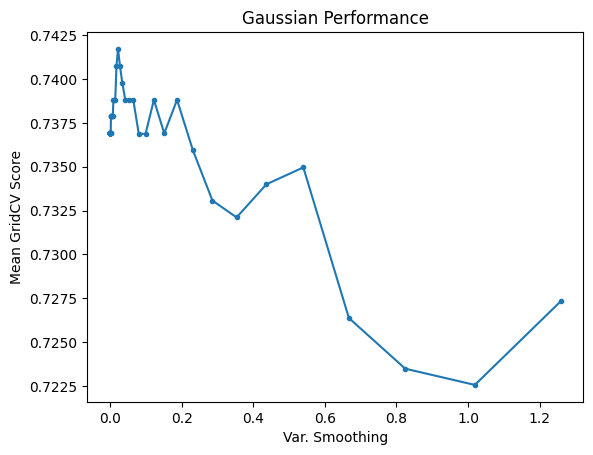

In [27]:
g_results = pd.DataFrame(gaussian_grid.cv_results_["params"])
g_results["test_score"] = gaussian_grid.cv_results_["mean_test_score"]

plt.plot(g_results["var_smoothing"], g_results["test_score"], marker = ".")
plt.xlabel("Var. Smoothing")
plt.ylabel("Mean GridCV Score")
plt.title("Gaussian Performance")
plt.show()

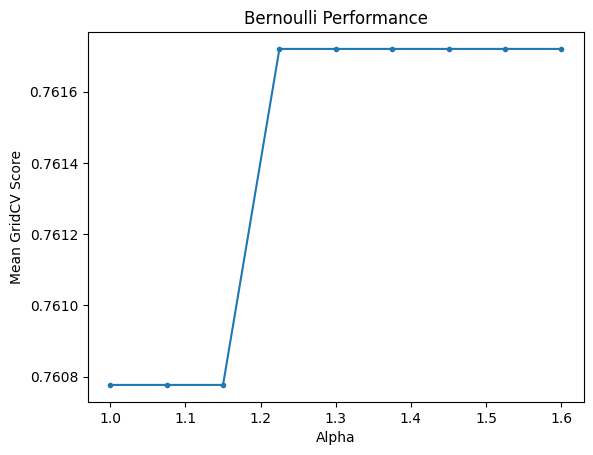

In [28]:
b_results = pd.DataFrame(bernoulli_grid.cv_results_["params"])
b_results["test_score"] = bernoulli_grid.cv_results_["mean_test_score"]

plt.plot(b_results["alpha"], b_results["test_score"], marker = ".")
plt.xlabel("Alpha")
plt.ylabel("Mean GridCV Score")
plt.title("Bernoulli Performance")
plt.show()

In [29]:
grid_nb  = {"Grid Gaussian": gaussian_grid, "Grid Bernouli": bernoulli_grid}

y_pred = gaussian_grid.predict(Data_transformed)

for grid in grid_nb:
    grid_nb[grid].fit(X_train, y_train)
    y_pred = grid_nb[grid].predict(Data_transformed)

    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    CR = classification_report(y_test, y_pred, output_dict = True)
    CR = pd.DataFrame(CR).transpose()[:2]

    for line_number in range(len(CR)):
    # Append a row to the DataFrame
      new_row = {"Classifier": grid, "y": line_number, "Accuracy": accuracy_score(y_test, y_pred),
                 "Precision": CR["precision"][line_number], "Recall": CR["recall"][line_number],
                 "F1-Score": CR["f1-score"][line_number]}

      results = pd.concat([results, pd.DataFrame([new_row])], ignore_index = True)

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Fitting 20 folds for each of 9 candidates, totalling 180 fits


In [30]:
results

,Classifier,y,Accuracy,Precision,Recall,F1-Score
0,Gaussian,0,0.725191,0.742331,0.801325,0.770701
1,Gaussian,1,0.725191,0.696970,0.621622,0.657143
2,Bernouli,0,0.717557,0.742138,0.781457,0.761290
3,Bernouli,1,0.717557,0.679612,0.630631,0.654206
4,Grid Gaussian,0,0.732824,0.745455,0.814570,0.778481
5,Grid Gaussian,1,0.732824,0.711340,0.621622,0.663462
6,Grid Bernouli,0,0.721374,0.763514,0.748344,0.755853
7,Grid Bernouli,1,0.721374,0.666667,0.684685,0.675556


**Training and Testing on Decision Tree Classifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
X = cruise_analysis.drop(["PurchasedPackage"], axis = 1)
y = cruise_analysis["PurchasedPackage"]

In [33]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [34]:
print("Training split input:", X_train.shape)
print("Testing split input:", X_test.shape)

Training split input: (1047, 9)
Testing split input: (262, 9)


In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       151
           1       0.66      0.60      0.63       111

    accuracy                           0.70       262
   macro avg       0.70      0.69      0.69       262
weighted avg       0.70      0.70      0.70       262



In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7022900763358778


In [37]:
from sklearn import metrics

dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 10)
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7290076335877863


In [38]:
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7633587786259542


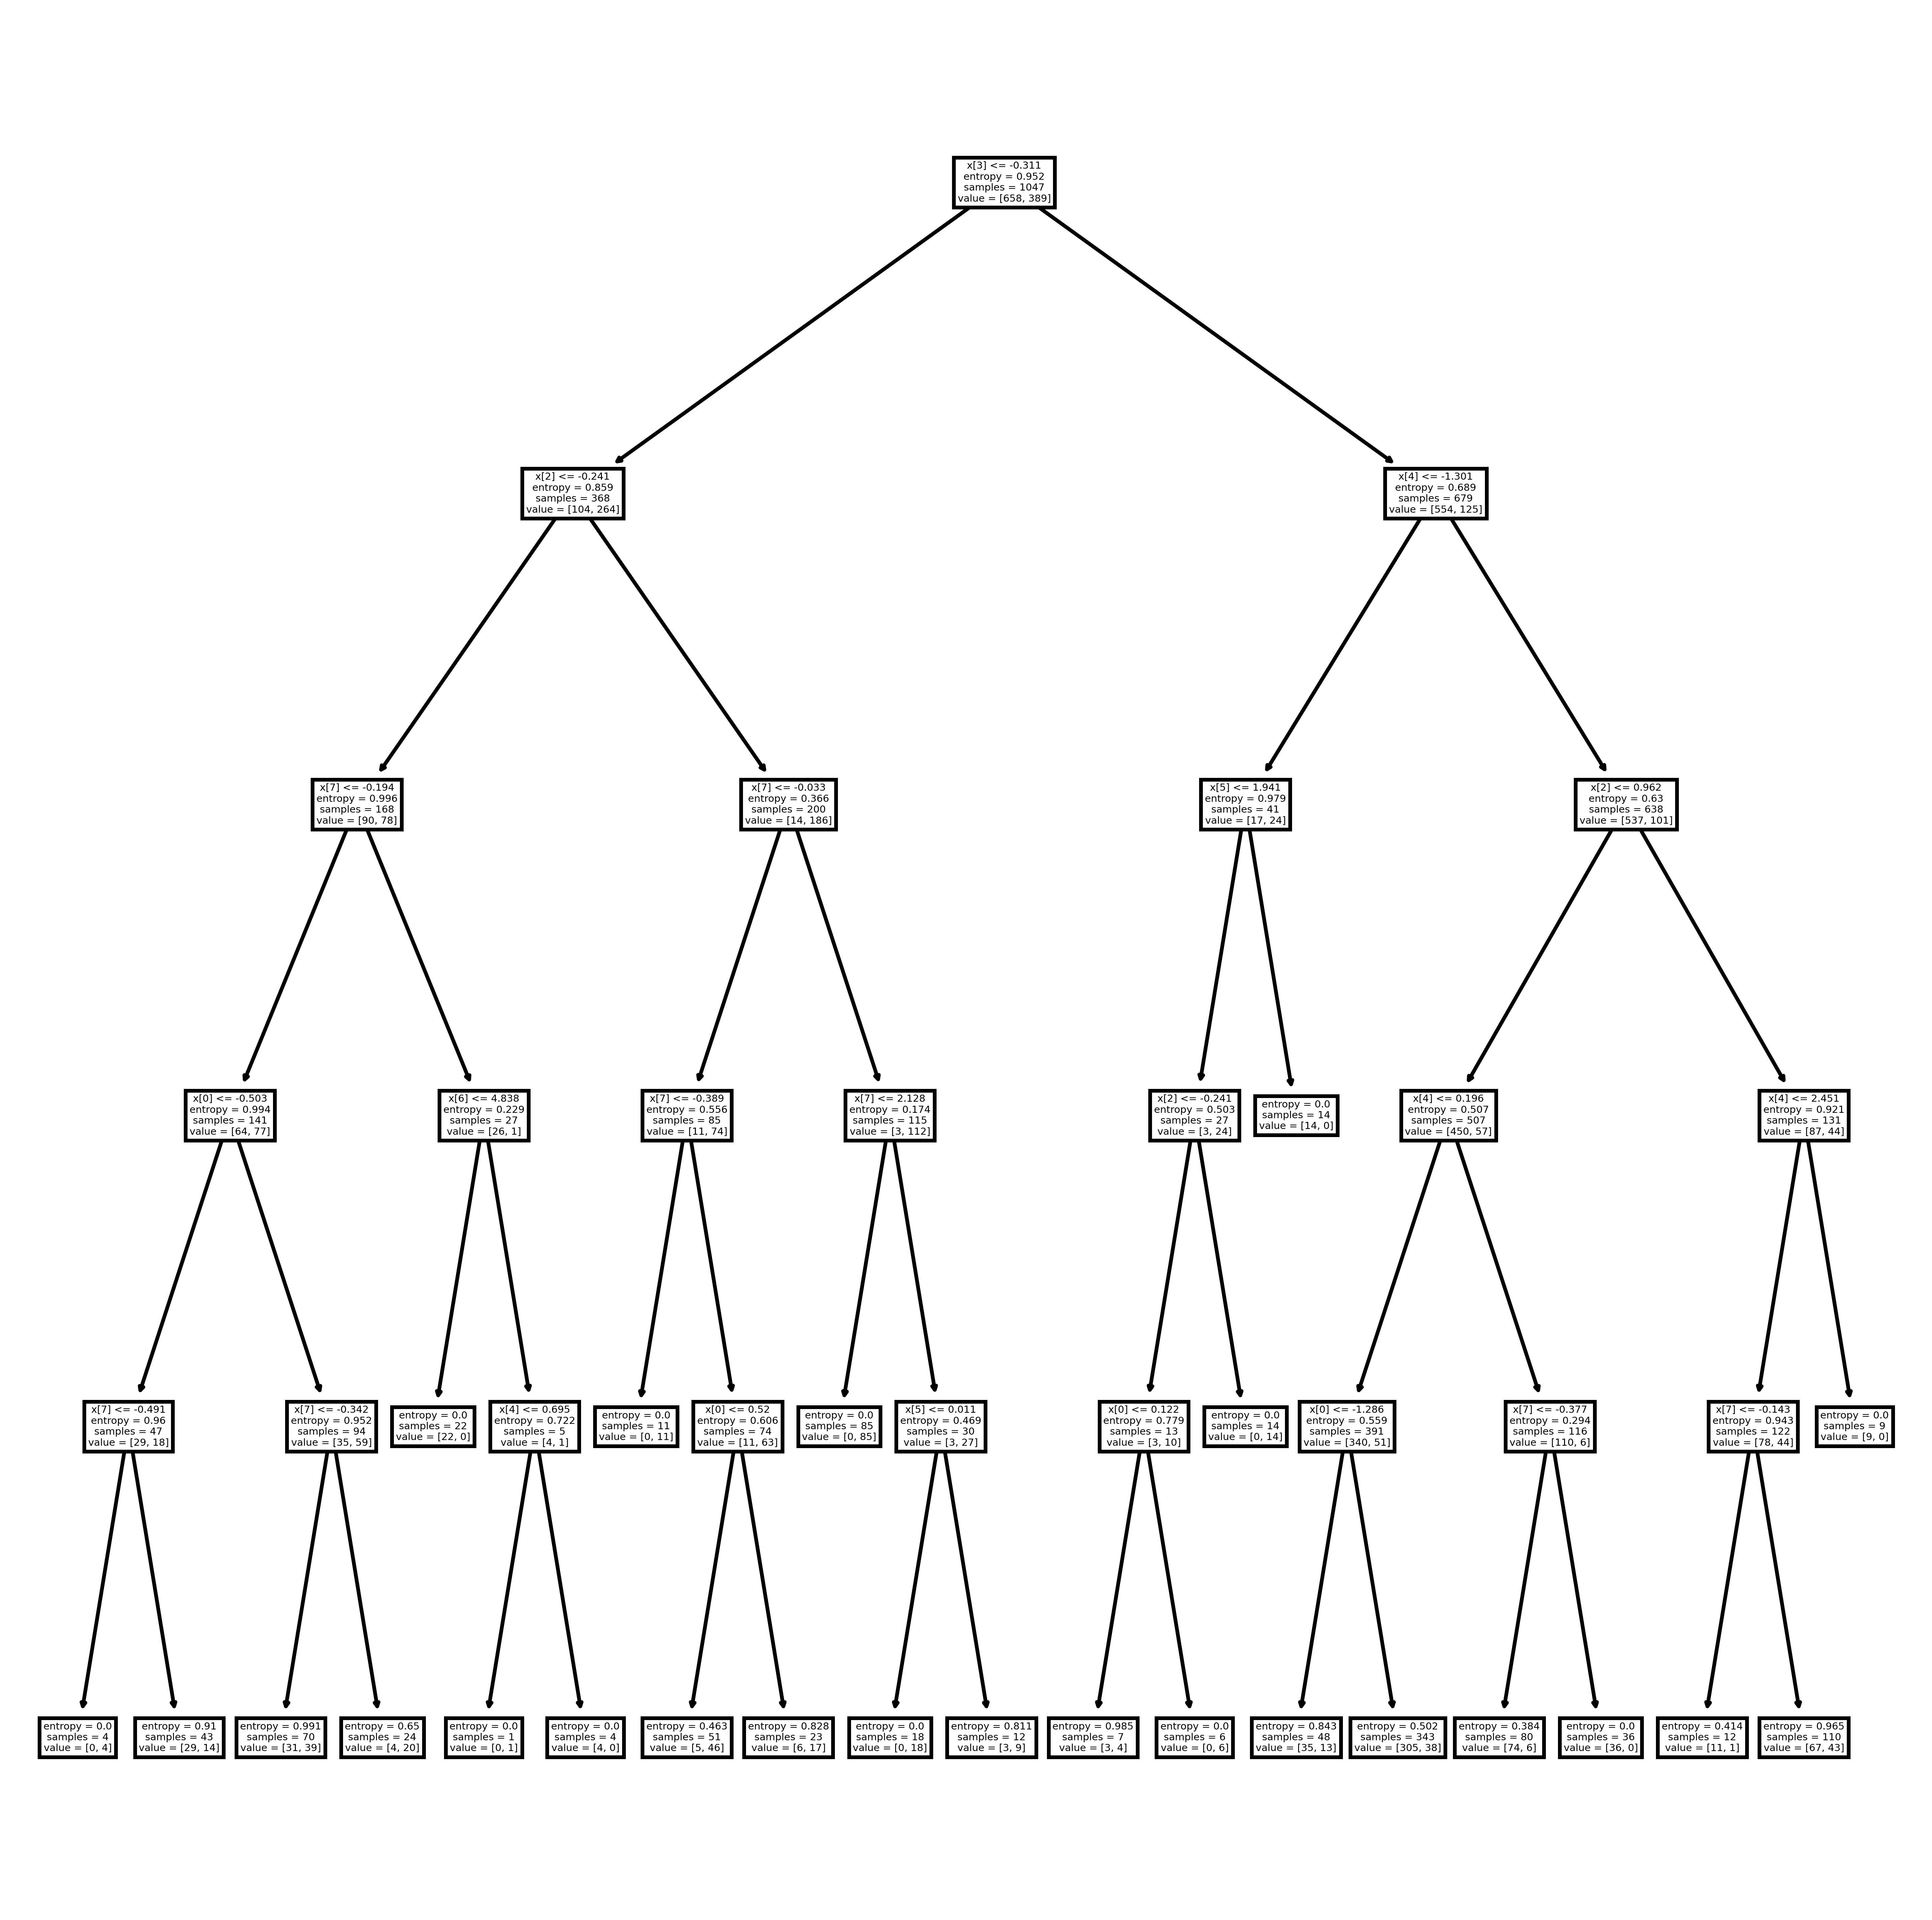

In [39]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (9,9), dpi=800)

tree.plot_tree(dtc)

plt.show()

In [40]:
ca = cruise_analysis.copy()
ca = ca.drop("PurchasedPackage", axis = 1)

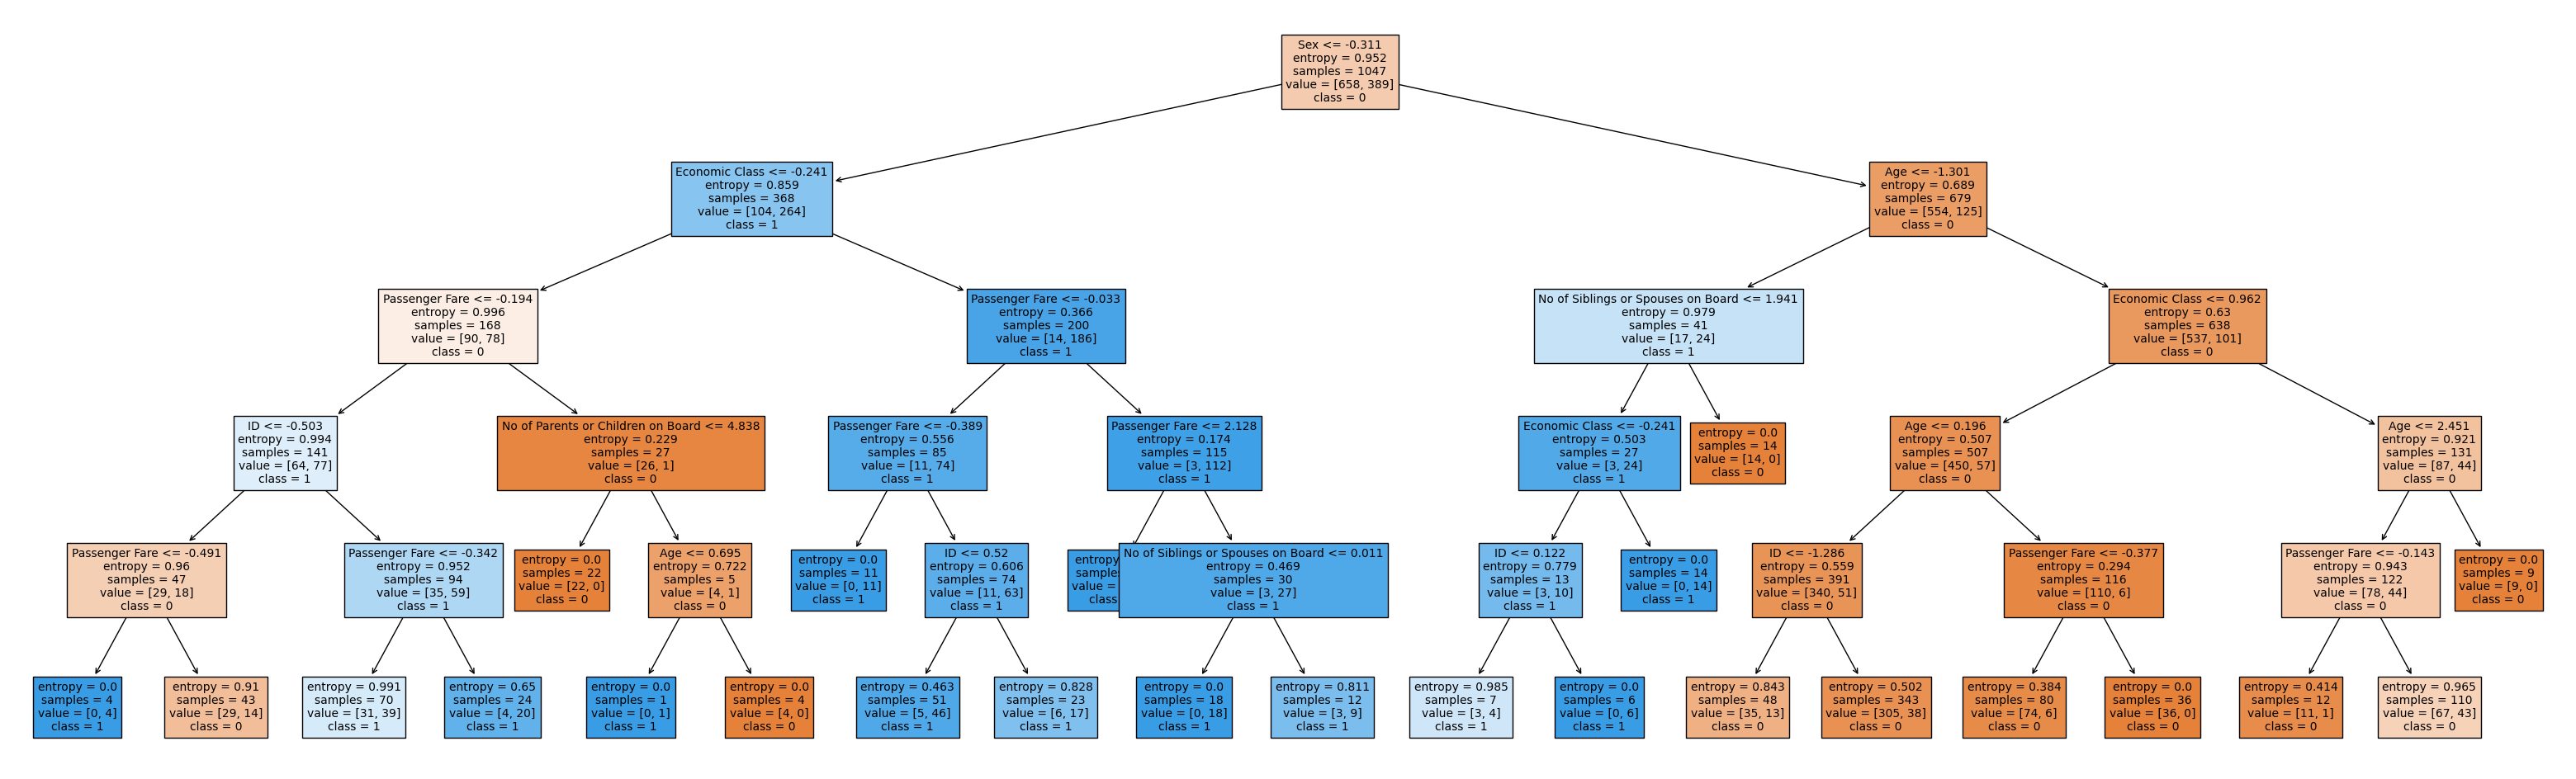

In [41]:
plt.figure(figsize = (40, 12))
dtree = tree.plot_tree(decision_tree = dtc, feature_names = ca.columns, class_names = ["0", "1",], filled = True, fontsize = 10)

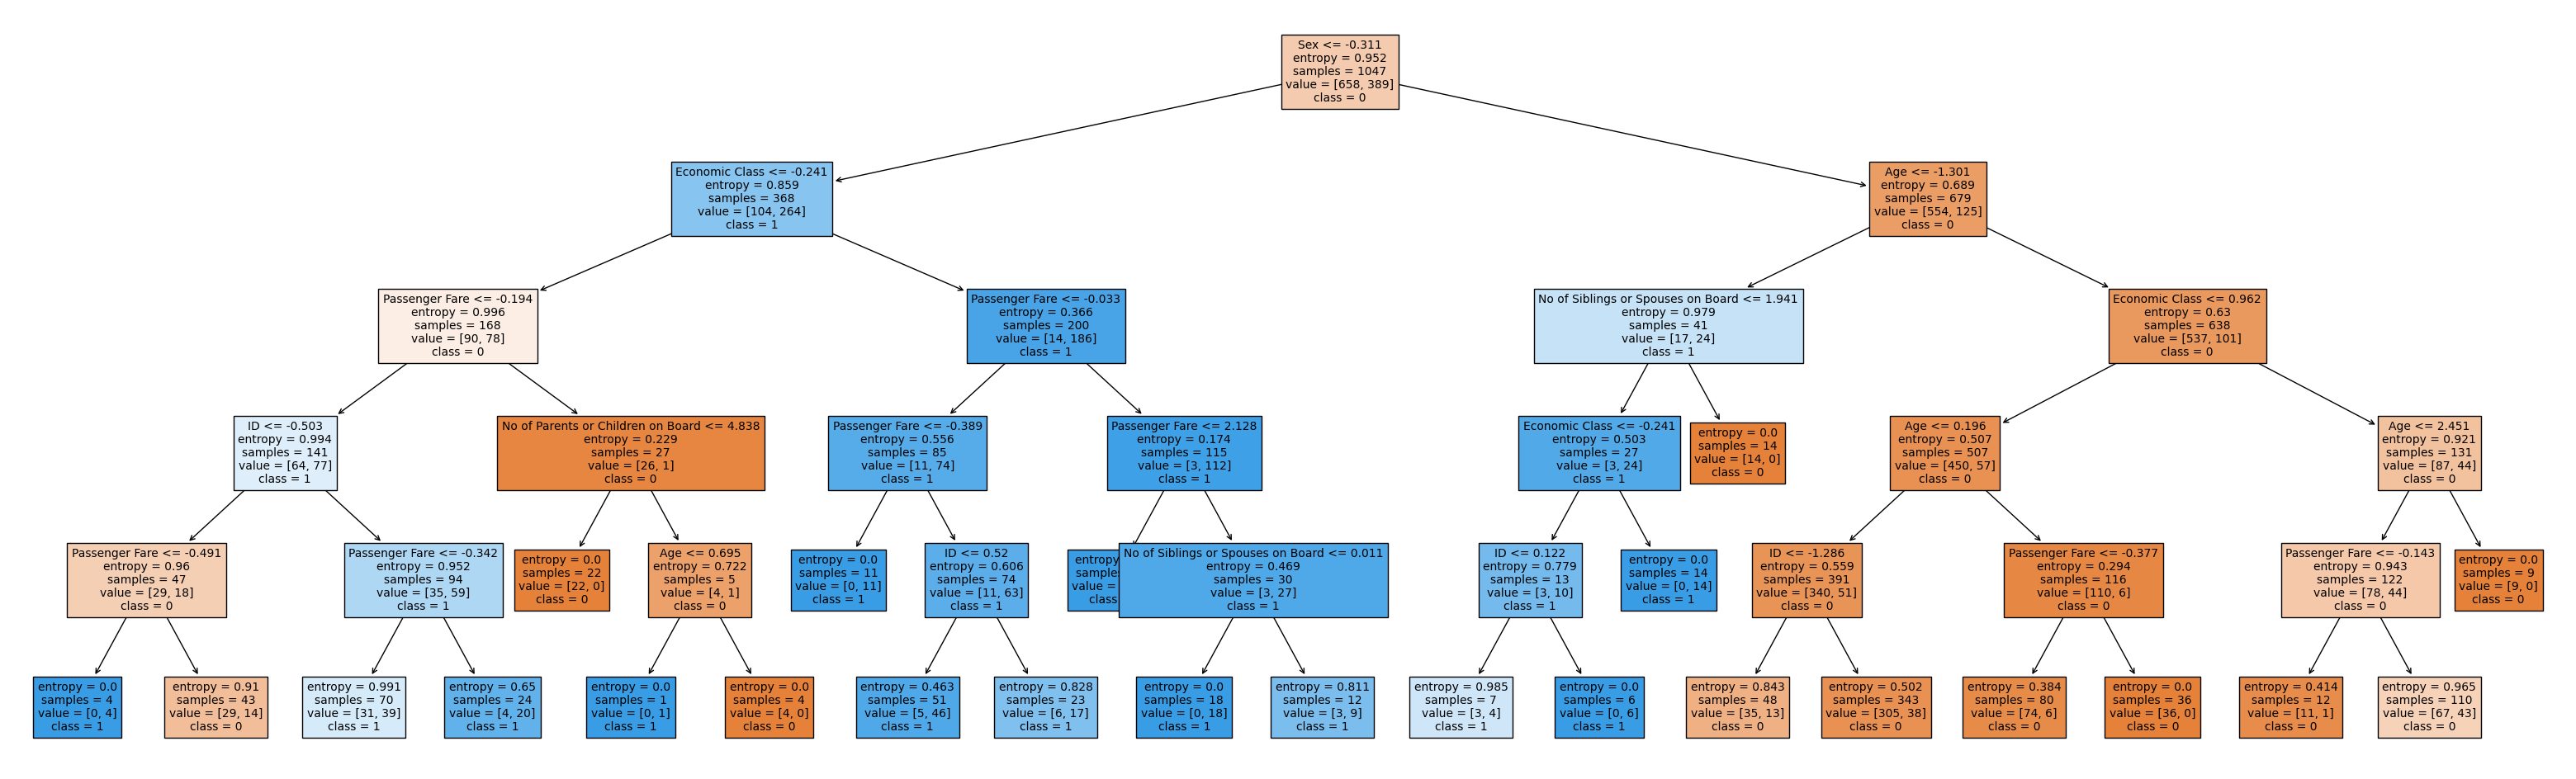

In [42]:
plt.figure(figsize = (40, 12))
dtree = tree.plot_tree(decision_tree = dtc, feature_names = ca.columns, class_names = ["0", "1"], filled = True, fontsize = 10)

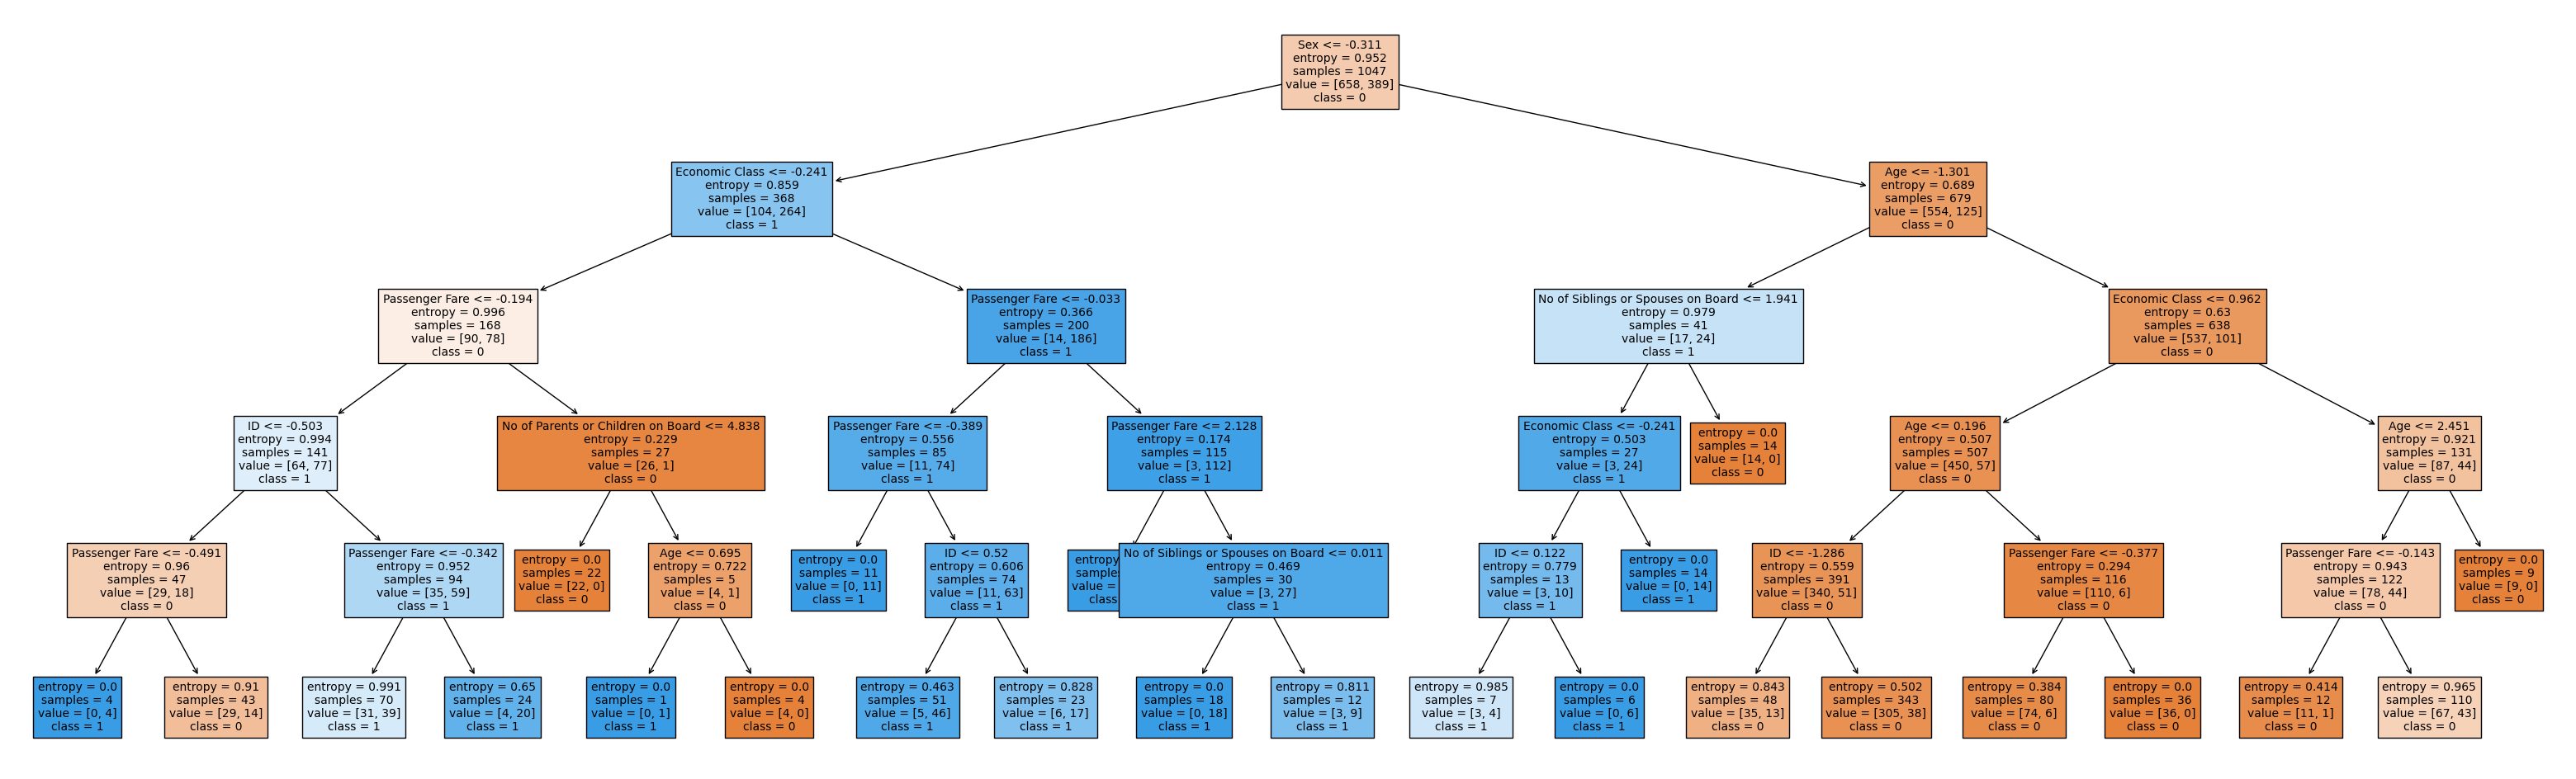

In [43]:
plt.figure(figsize = (40, 12))
dtree = tree.plot_tree(decision_tree = dtc, feature_names = ca.columns, class_names = ["0", "1"], filled = True, fontsize = 10)

In [44]:
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7824427480916031


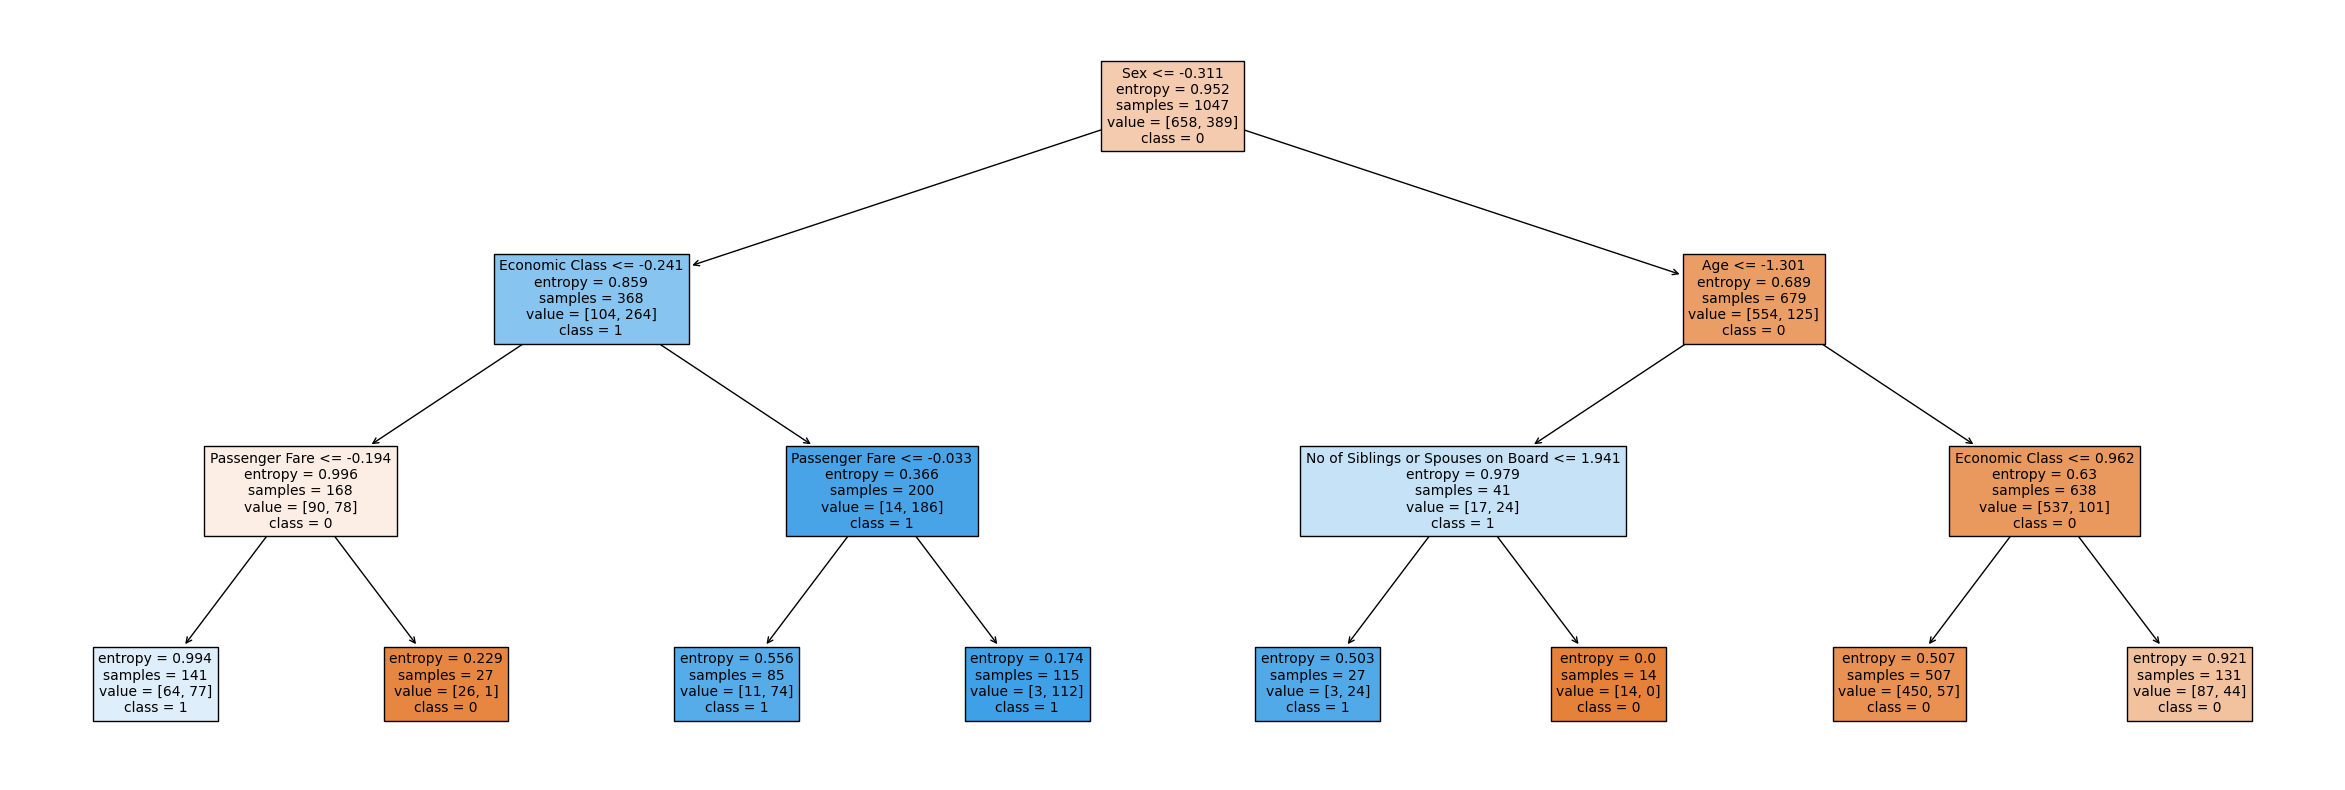

In [45]:
plt.figure(figsize = (30, 10))
dtree = tree.plot_tree(decision_tree = dtc, feature_names = ca.columns, class_names = ["0", "1"], filled = True, fontsize = 10)

**Tuning Decision Tree Classifier**

In [46]:
d_params = {"max_depth": [None, 5, 20, 35], "min_samples_split": [2, 6, 10],
            "min_samples_leaf": [1, 3, 5], "max_features": ["sqrt", "log2"]}

d_grid = GridSearchCV(estimator = dtc, param_grid = d_params, cv = 5, scoring = "accuracy")

d_grid.fit(Data_transformed, y_test);

In [47]:
d_grid.best_score_

0.7711901306240929

In [48]:
print("Classification report - \n", classification_report(y_test, y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.78      0.68      0.73       111

    accuracy                           0.78       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262

